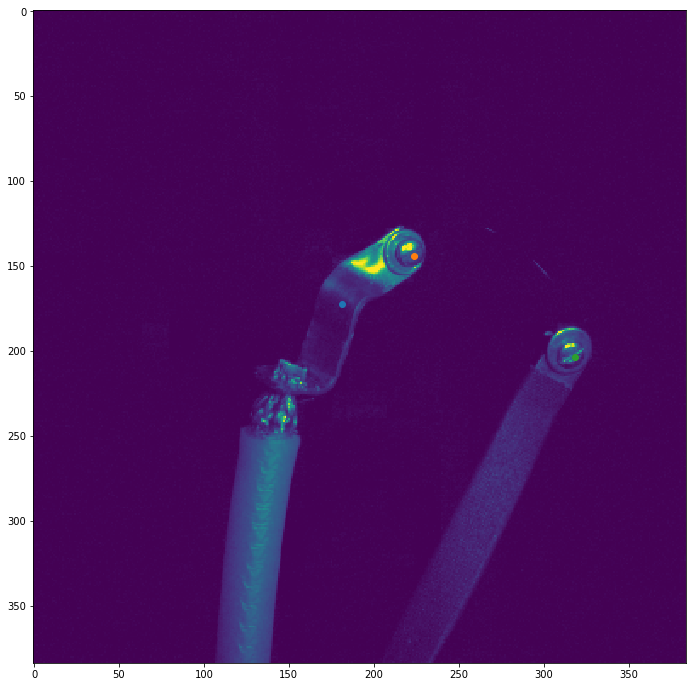

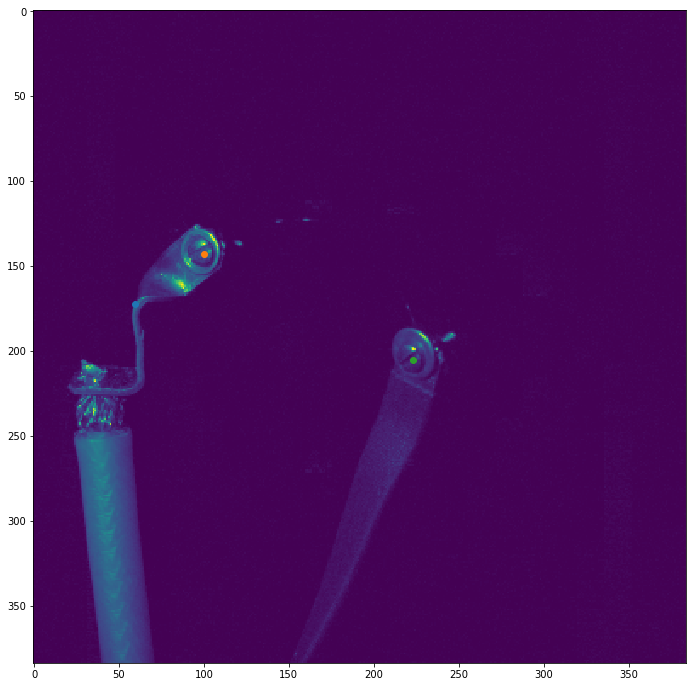

384


In [51]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import cv2
from pandas import DataFrame, Series  # for convenience
from scipy.misc import imsave
import pims
import trackpy as tp
from pims import Frame
import math

################################################
# Read csv data of tracking
################################################
BR = [[5.7149E-08,1.1882E-05,-2.4321E-03],[8.8831E-06,-5.3566E-07,-3.8744E-02],[-1.6469E-03,3.3774E-02,9.9867E-01]]
TR = [[-5.7704E-08,1.1998E-05,-2.1514E-03],[8.9694E-06,5.4087E-07,-3.9328E-02],[-1.7813E-03,3.3894E-02,9.9865E-01]]
TL = [[1.1040E-07,2.2954E-05,-4.1584E-03],[1.7160E-05,-1.0348E-06,6.8654E-02],[-3.4505E-03,-7.3661E-02,9.9490E-01]]
BL = [[-1.0175E-07,2.1155E-05,-4.2910E-03],[1.5815E-05,9.5369E-07,6.2907E-02],[-2.8931E-03,-6.8254E-02,9.9567E-01]]
Matr = BR
normal = np.max(Matr)
MatrixL = np.array(Matr)/normal
MatrixR = MatrixL.transpose()
picL = 18333
picR = 18158
imgL = cv2.imread('/Users/pinghanchu/Documents/Git/Data/Shot119_Cam_{}.tif'.format(picL),0) #queryimage # left image
imgR = cv2.imread('/Users/pinghanchu/Documents/Git/Data/Shot119_Cam_{}.tif'.format(picR),0) #trainimage # right image
cL1 = [181.544,384-211.678]
cR1 = [59.61,384-211.61]
cL2 = [223.43,384-240]
cR2 = [99.95,384-241.25]
cL3 = [318.36,384-180.553]
cR3 = [223.26,384-178.93]
plt.figure()
plt.figure(figsize=[12,12])
plt.imshow(imgL)
plt.plot(cL1[0],cL1[1],'o')
plt.plot(cL2[0],cL2[1],'o')
plt.plot(cL3[0],cL3[1],'o')
plt.show()
plt.figure()
plt.figure(figsize=[12,12])
plt.imshow(imgR)
plt.plot(cR1[0],cR1[1],'o')
plt.plot(cR2[0],cR2[1],'o')
plt.plot(cR3[0],cR3[1],'o')
plt.show()
print(len(imgL))

In [52]:
ipL = [cL2[0],cL2[1],1]
ipR = [cR2[0],cR2[1],1]    
LineL = np.dot(ipR,MatrixL) #points in the right frame and the corresponding epipolar lines in the left frame
LineR = np.dot(ipL,MatrixR) #points in the right frame and the corresponding epipolar lines in the left frame
dlr = math.fabs(np.dot(ipL,LineL))/math.sqrt(LineL[0]*LineL[0]+LineL[1]*LineL[1])
drl = math.fabs(np.dot(ipR,LineR))/math.sqrt(LineR[0]*LineR[0]+LineR[1]*LineR[1])
FF = dlr + drl
print(dlr,drl)
print(LineL,LineR)

(4.728631582612163, 4.477581787137316)
(array([ -3.73622350e-04,   3.49315995e-02,  -4.78148377e+00]), array([ -7.09266523e-04,  -3.68854416e-02,   5.50147610e+00]))
